In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=150, resize=0.4)

In [ ]:
X, y = lfw.data, lfw.target

In [88]:
# Pipeline - stage 1 ->(x)->(reducued)
def do_pca(n_components, x):
    pca = PCA(n_components=n_components, random_state=2)
    reduced = pca.fit_transform(x)
    return reduced
# Pipeline - stage 2 ->(reduced, y)->(train_set, test_set)
def split(reduced, y):
    return train_test_split(reduced, y, test_size=0.25, random_state=2)
def train_eval_mlp(splitted):
    X_train, X_test, y_train, y_test = splitted
    mlp = MLPClassifier(random_state=2)
    mlp.fit(X_train, y_train)
    return mlp, accuracy_score(y_test, mlp.predict(X_test))

In [ ]:
X.shape

(766, 1850)

In [89]:
scores = []
n_comps = []
max_n_components = int(min(X.shape)/2)
for i in range(5, max_n_components, 10):
    reduced = do_pca(i, X)
    model, score = train_eval_mlp(split(reduced, y))
    n_comps.append(i)
    scores.append(score)
    print("n_components:", i, "Accuracy:", score)

n_components: 5 Accuracy: 0.6927083333333334
n_components: 15 Accuracy: 0.8541666666666666
n_components: 25 Accuracy: 0.8697916666666666
n_components: 35 Accuracy: 0.9010416666666666
n_components: 45 Accuracy: 0.8854166666666666
n_components: 55 Accuracy: 0.875
n_components: 65 Accuracy: 0.8958333333333334
n_components: 75 Accuracy: 0.9114583333333334
n_components: 85 Accuracy: 0.8541666666666666
n_components: 95 Accuracy: 0.890625
n_components: 105 Accuracy: 0.8854166666666666
n_components: 115 Accuracy: 0.9010416666666666
n_components: 125 Accuracy: 0.8802083333333334
n_components: 135 Accuracy: 0.8645833333333334
n_components: 145 Accuracy: 0.859375
n_components: 155 Accuracy: 0.8385416666666666
n_components: 165 Accuracy: 0.875
n_components: 175 Accuracy: 0.890625
n_components: 185 Accuracy: 0.8697916666666666
n_components: 195 Accuracy: 0.8333333333333334
n_components: 205 Accuracy: 0.8489583333333334
n_components: 215 Accuracy: 0.8385416666666666
n_components: 225 Accuracy: 0.895

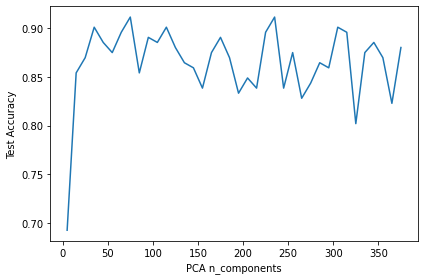

In [90]:
plt.plot(n_comps, scores)
plt.xlabel('PCA n_components')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

In [91]:
best_n_comp = n_comps[scores.index(max(scores))]
print("Highest test accuracy ({0}) was reached with n_components={1}".format(max(scores), best_n_comp))

Highest test accuracy (0.9114583333333334) was reached with n_components=75


In [92]:
# Secondary narrowed bruteforce
scores = []
n_comps = []
for i in range(best_n_comp-10, best_n_comp+10):
    reduced = do_pca(i, X)
    model, score = train_eval_mlp(split(reduced, y))
    n_comps.append(i)
    scores.append(score)
    print("n_components:", i, "Accuracy:", score)

n_components: 65 Accuracy: 0.8958333333333334
n_components: 66 Accuracy: 0.8697916666666666
n_components: 67 Accuracy: 0.921875
n_components: 68 Accuracy: 0.8958333333333334
n_components: 69 Accuracy: 0.8645833333333334
n_components: 70 Accuracy: 0.9166666666666666
n_components: 71 Accuracy: 0.9010416666666666
n_components: 72 Accuracy: 0.8958333333333334
n_components: 73 Accuracy: 0.8645833333333334
n_components: 74 Accuracy: 0.9114583333333334
n_components: 75 Accuracy: 0.9114583333333334
n_components: 76 Accuracy: 0.8854166666666666
n_components: 77 Accuracy: 0.8802083333333334
n_components: 78 Accuracy: 0.90625
n_components: 79 Accuracy: 0.8958333333333334
n_components: 80 Accuracy: 0.8645833333333334
n_components: 81 Accuracy: 0.8697916666666666
n_components: 82 Accuracy: 0.8645833333333334
n_components: 83 Accuracy: 0.8958333333333334
n_components: 84 Accuracy: 0.8541666666666666


In [93]:
best_n_comp = n_comps[scores.index(max(scores))]
print("Highest test accuracy ({0}) was reached with n_components={1}".format(max(scores), best_n_comp))

Highest test accuracy (0.921875) was reached with n_components=67


In [94]:
reduced = do_pca(best_n_comp, X)
splitted = split(reduced, y)
X_train, X_test, y_train, y_test = splitted
model, score = train_eval_mlp(splitted)
y_pred = model.predict(X_test)

In [95]:
confusion_matrix(y_test, y_pred)

array([[ 55,   7],
       [  8, 122]])